1) Read the data
2) Data quality checks
3) Impute the missing values
4) Perform the outlier analysis and impute with median
5) Drop the ID columns
6) Apply Feature selection only on Numerical columns
7) Apply label encoder
8) Standardize the data
9) PCA 
10) Develop the model on PCA data with hyper parameter tuning
11) Download the test data
12) Apply the same concepts on test data also(PCA)
13) Pass this to the model and get the predictions
14) Upload the solution file on analytics Vidhya website
15) Submit the solution file and screen shot

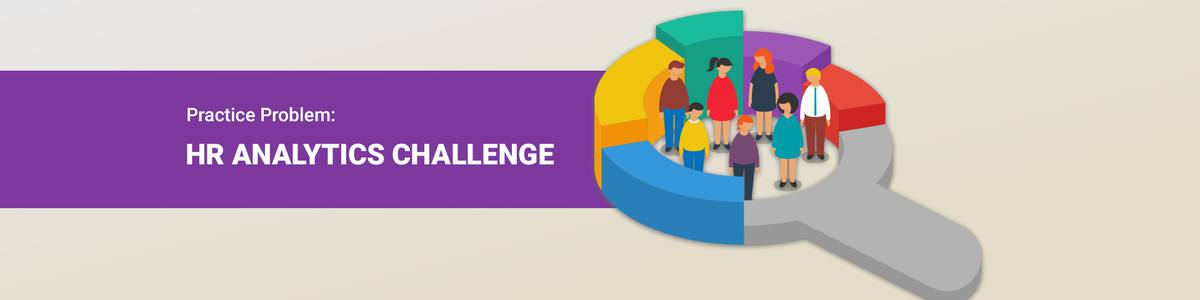

# Objective  - HR Analytics

# Exploratory Data Analysis (EDA)

# 1. Load Python Modules

In [1]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
file_path=r"train_data.csv"
hr_df=pd.read_csv(file_path)
hr_df

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.csv'

In [ ]:
#drop - sensitive - non imp columns for data analysis 
print(hr_df["employee_id"].nunique())
hr_df.drop("employee_id",axis=1,inplace=True)
# print columns names
print(hr_df.columns)

# 3. Basic Inspection on given dataset

In [ ]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(hr_df)

**Observations**

- HR Dataset is a machine learning classification task.
- is_promoted  is the target column and did not have any null values.
- We have 12 Independent Variables, with 5 as categorical and the rest are numerical.
- Observed missing values in education in Categorical Columns.
- Observed missing values in previous_year_rating  in Numerical Columns.
- We have a total of 54808 records/samples/observations.


# 4. Handling Missing Values - Categorical - Variables

- Missing Values in Categorical Columns - Replaced with Mode

In [ ]:
def print_cat_values(df,cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",df[cat_var].unique())
    print("num of categories:",df[cat_var].nunique())
    print("Value-counts:", df[cat_var].value_counts())  

In [ ]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['education']

In [ ]:
for var in cat_vars:
    print_cat_values(hr_df,var)
    print("=========================================")
    print()

In [ ]:
for var in cat_vars:
    mode = hr_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    hr_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

# 5. Categorical- UniVariate - Analysis -Using Pipeline

- Categorical Uni Variate Analysis
- Frequency Table
- Relative Frequency Table
- Bar Chart
- Pi Chart

In [ ]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [ ]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(hr_df)

**Observations**





# 6. Handling Missing Values in Numerical Columns

- Handling the Missing Values in Numerical Columns by median

In [ ]:
hr_df.isnull().sum()

In [ ]:
hr_df.describe()

In [ ]:
for var in ["previous_year_rating"]:
    median = hr_df[var].median()
    #print(median)

    # fill the missing value with mode
    hr_df[var].fillna(median,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

- Numerical Uni Variate Analysis
- Frequency Interval Data Distribution
- Box Plot
- Histogram with KDE
- Histogram

In [ ]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        
        

In [ ]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_df)

**Observations**

- is_promoted, awards_won,kpi_met - we can tranform to cat
- it is imbalanced dataset


# Convert Columns Proper Datatype( Num to Cat)

In [ ]:
# Convert numerical column to categorical column
hr_df['is_promoted_cat'] = hr_df['is_promoted'].map({1: 'Yes', 0: 'No'})
hr_df['awards_won_cat'] = hr_df['awards_won?'].map({1: 'Yes', 0: 'No'})
hr_df['KPIs_met_cat'] = hr_df['KPIs_met >80%'].map({1: 'Yes', 0: 'No'})


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

ratings = hr_df["previous_year_rating"]
# Fit and transform the ratings
encoded_ratings = label_encoder.fit_transform(ratings)
# Replace the original column with the encoded values
hr_df["previous_year_rating"] = encoded_ratings

trainings=hr_df["no_of_trainings"]
encoded_trainings = label_encoder.fit_transform(trainings)
hr_df["no_of_trainings"] = encoded_trainings
hr_df["previous_year_rating"] = hr_df["previous_year_rating"].astype("object")
hr_df["no_of_trainings"] = hr_df["no_of_trainings"].astype("object")

In [ ]:
hr_df.drop("is_promoted",axis=1,inplace=True)
hr_df.drop("awards_won?",axis=1,inplace=True)
hr_df.drop("KPIs_met >80%",axis=1,inplace=True)

In [ ]:
hr_df.dtypes

In [ ]:
processed_data = pipeline_cat_var.fit_transform(hr_df)

# 8. Numerical - Variables -Outliers Analysis - fillit

- Fill the outliers in Numericals cols with median

In [ ]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars)

In [ ]:
num_vars = hr_df.select_dtypes(exclude="object").columns
print(num_vars)

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [ ]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat',  'no_of_trainings', 'previous_year_rating']

In [ ]:
target="is_promoted_cat"
fig,ax = plt.subplots(5,2,figsize=(20,14))
for axi,x in zip(ax.flat,cat_vars):
    col1=hr_df[x]
    col2=hr_df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)


In [ ]:
## Cat Vs Cat
fig,ax = plt.subplots(5,2,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=target,hue=x,ax=axi,data=hr_df)

## 9.2 Num vs Num

### Scatter Plots for corelation b/w numerical variables

In [ ]:
num_cols1 = hr_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

In [ ]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue=target,data=hr_df)
            plt.show()
    num_cols2.pop(0)
    

In [ ]:
corr_mat=hr_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

In [ ]:
hr_df.drop("length_of_service",axis=1,inplace=True)

In [ ]:
hr_df.select_dtypes(exclude="object").columns
print(hr_df.select_dtypes(exclude="object").columns)
output_var=target

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0], x=output_var, y='age', data=hr_df)
sns.boxplot(ax=axes[1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var, y='age', data=hr_df)
sns.violinplot(ax=axes[1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var, x='age', data=hr_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var, x='avg_training_score', data=hr_df,kde=True)
plt.show()

# 10. Data Transformation

In [ ]:
hr_df.select_dtypes(exclude='object').columns

In [ ]:
hr_df["age_log"]=np.log(hr_df["age"])
hr_df["avg_training_score_log"]=np.log(hr_df["avg_training_score"])

hr_num_df = hr_df[['age_log', 'avg_training_score_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_num_df)

In [ ]:
hr_df["avg_training_score_sqrt"]=np.sqrt(hr_df["avg_training_score"])

hr_num_df = hr_df[["avg_training_score_sqrt"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_num_df)

# 11. Standization - Normalization

In [ ]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(hr_df[['age_log', 'avg_training_score_log']])

# Replace the original columns with the scaled columns
hr_df[['age_log_stand', 'avg_training_score_log_stand']] = scaled_columns

print(hr_df)

# 12. Convert Cat - to - Numerical Columns

In [ ]:
hr_df["previous_year_rating"] = hr_df["previous_year_rating"].astype("int")
hr_df["no_of_trainings"] = hr_df["no_of_trainings"].astype("int")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
hr_df["is_promoted"]=le.fit_transform(hr_df["is_promoted_cat"])

for var in ['department','region','region', 'education', 'gender', 'recruitment_channel','awards_won_cat','KPIs_met_cat']:
    hr_df[var]=le.fit_transform(hr_df[var])

# 13. SMOTE for Balancing Data

In [ ]:
Y=hr_df["is_promoted"]
X=hr_df[[ 'department', 'region','education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat','previous_year_rating', 'no_of_trainings', 'age_log_stand', 'avg_training_score_log_stand']].copy()
print(len(Y),len(X))
print(len(Y),len(X))

In [ ]:
X.dtypes

In [ ]:
#new_x, new_y = SMOTE().fit_resample(X, Y)
#print(new_x.columns)
#print(len(new_y),len(new_x))

In [ ]:
#new_y.value_counts()

# ML Models

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [ ]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

In [ ]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Random Forest

In [ ]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

In [ ]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Test Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Test data

In [ ]:
test_file=r"test_data.csv"
test_df=pd.read_csv(test_file)
test_df

In [ ]:
print("check the missing value in each column")
print(test_df.isna().sum())
    
print()
print("table describe")
print(test_df.describe())

In [ ]:
education_mode = test_df["education"].mode()[0]
test_df["education"].fillna(education_mode,inplace=True)

In [ ]:
print(test_df.isna().sum())

In [ ]:
test_df["previous_year_rating"].fillna(3,inplace=True)

In [ ]:
print(test_df.isna().sum())

In [ ]:
# Convert numerical column to categorical column
test_df['awards_won_cat'] = test_df['awards_won?'].map({1: 'Yes', 0: 'No'})
test_df['KPIs_met_cat'] = test_df['KPIs_met >80%'].map({1: 'Yes', 0: 'No'})

In [ ]:
for var in ['department', 'region','education', 'gender', 'recruitment_channel','awards_won_cat','KPIs_met_cat','previous_year_rating','no_of_trainings']:
    test_df[var]=le.fit_transform(test_df[var])

In [ ]:
test_df.drop(["length_of_service","employee_id","KPIs_met >80%","awards_won?"],axis=1,inplace=True)

In [ ]:
test_df.dtypes

In [ ]:
test_df["age_log"]=np.log(test_df["age"])
test_df["avg_training_score_log"]=np.log(test_df["avg_training_score"])


In [ ]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(test_df[['age_log', 'avg_training_score_log']])

# Replace the original columns with the scaled columns
test_df[['age_log_stand', 'avg_training_score_log_stand']] = scaled_columns

print(test_df)

In [ ]:
final_test=test_df[['department', 'region','education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat','previous_year_rating', 'no_of_trainings', 'age_log_stand', 'avg_training_score_log_stand']].copy()

In [ ]:
y_pred =  xgmodel.predict(final_test)

In [ ]:
output_df = pd.read_csv("sample_submission.csv")

In [ ]:
output_df["is_promoted"]=y_pred

In [ ]:
output_df.to_csv("output.csv",index=False)